In [1]:
!pip install numpy opencv-python scikit-learn tqdm


Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [52]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

DATASET_PATH = r"C:\Users\HPP\Downloads\archive (1)\kagglecatsanddogs_3367a\PetImages"
IMG_SIZE = 64  
def load_data(base_path):
    X, y = [], []
    for label, folder in enumerate(['Cat', 'Dog']):  
        path = os.path.join(base_path, folder)
        for filename in tqdm(os.listdir(path), desc=f"Loading {folder} images"):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(path, filename)
                img = cv2.imread(img_path) 
                if img is not None:
                    try:
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
                        img = img.flatten()  
                        X.append(img)
                        y.append(label)
                    except:
                        pass
    return np.array(X), np.array(y)

# Load the data
print("Loading data...")
X, y = load_data(DATASET_PATH)
print(f"Loaded {len(X)} images: {sum(y==0)} cats and {sum(y==1)} dogs.")

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Loading data...


Loading Dog images: 100%|████████████████████████████████████████████████████████| 12470/12470 [51:05<00:00,  4.07it/s]


Loaded 24959 images: 12490 cats and 12469 dogs.


C:\Users\HPP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5685096153846154
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      2538
           1       0.56      0.54      0.55      2454

    accuracy                           0.57      4992
   macro avg       0.57      0.57      0.57      4992
weighted avg       0.57      0.57      0.57      4992



In [59]:
import matplotlib.pyplot as plt

def show_prediction(index):
    img_flat = X_test[index]
    pred = model.predict([img_flat])[0]
    true_class = y_test[index]

    img_rgb = (img_flat * 255).astype(np.uint8).reshape(IMG_SIZE, IMG_SIZE, 3)

    plt.imshow(img_rgb)
    plt.title(f"Actual: {'Cat' if true_class == 0 else 'Dog'} | Predicted: {'Cat' if pred == 0 else 'Dog'}")
    plt.axis('off')
    plt.show()


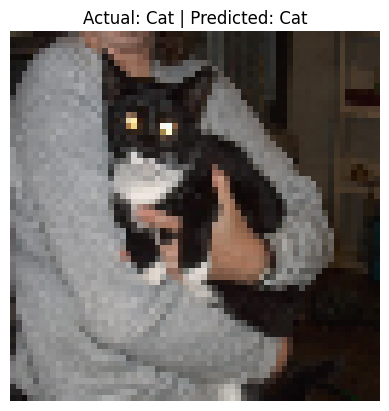

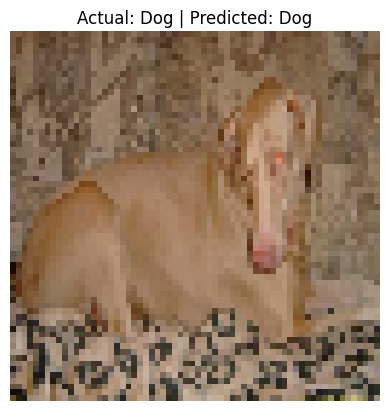

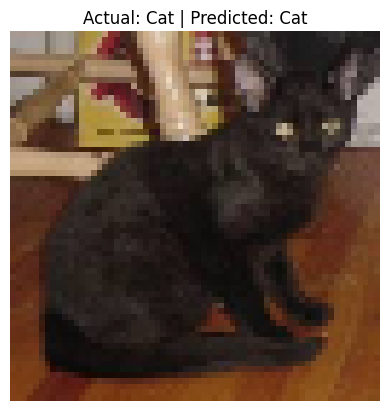

In [64]:
show_prediction(0)
show_prediction(11)
show_prediction(25)


In [55]:
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


              precision    recall  f1-score   support

         Cat       0.57      0.60      0.59      2538
         Dog       0.56      0.54      0.55      2454

    accuracy                           0.57      4992
   macro avg       0.57      0.57      0.57      4992
weighted avg       0.57      0.57      0.57      4992



In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("RF Accuracy:", rf_model.score(X_test, y_test))


RF Accuracy: 0.6412259615384616


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Reshape and normalize
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(y)

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


C:\Users\HPP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.5955 - loss: 0.6878 - val_accuracy: 0.6985 - val_loss: 0.5790
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7247 - loss: 0.5411 - val_accuracy: 0.7274 - val_loss: 0.5582
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7637 - loss: 0.4930 - val_accuracy: 0.7306 - val_loss: 0.5490
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7846 - loss: 0.4507 - val_accuracy: 0.7280 - val_loss: 0.5677
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8086 - loss: 0.4208 - val_accuracy: 0.7175 - val_loss: 0.5752


In [56]:
import joblib
joblib.dump(model, 'cat_dog_model.pkl')


['cat_dog_model.pkl']

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 64 

def predict_new_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found or unreadable.")
        return

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flat = img.flatten() / 255.0

    # Predict
    prediction = model.predict([img_flat])[0]
    label = 'Cat' if prediction == 0 else 'Dog'

    # Display image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()


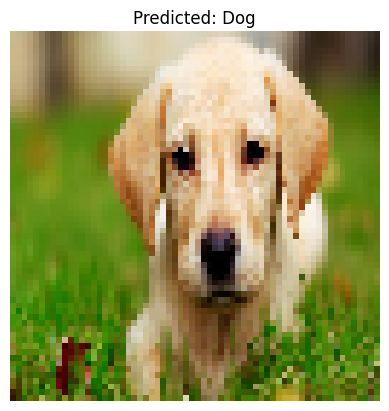

In [74]:
predict_new_image(r"C:\Users\HPP\Downloads\photoofanimal.jpeg")
